# Problem Set 2
### Due by 5PM Thursday 18 April, submitted online via Canvas.
## Instructions (please read everything carefully)

* The questions are given in
the cells, below. Your answers should be in this same notebook, beneath each
question (insert as many cells as you need), with
  - text in markdown cells.
Equations should be in $\LaTeX$
  - fully functional code, with comments so we
can understand what you are doing. If you based any part of your code on someone
else's initial implementation, cite appropriately.
  - outputs, in presentable
format.
    - Plots should have clear titles, axis labels, and legends if
needed.
    - Numerical answers should have a sensible number of digits with
surrounding text that identifies what is being printed.

* Submit your notebook
to Canvas for the specific assignment prior to the deadline. Please use a file
name that includes your name and the problem set number, *e.g.*,
pset2-Ritz.ipynb.

* Solutions will be posted soon after the deadline, and your
work will be graded within one week (usually sooner).

* Problems are typically
posted one week in advance. You are encouraged to work together on problems, but
the actual code and the full notebook must be your own work.

* The time it
takes to write code is often unpredictable, particularly at the beginning of the
quarter. Start early.

* If anything is unclear, please ask! The Discussion
Forum on Canvas is a convenient method that gives everyone the benefit of your
question and the answer(s). Your TA, Ben Lehmann, also provides numerous help
sessions throughout the week.

In [1]:
# these were discussed in lecture
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
print(sys.version)

3.5.6 |Anaconda custom (64-bit)| (default, Aug 26 2018, 16:30:03) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


## Problem 1
(a) Write your own `rk2` ODE solver. Make it general: have it call
a function f(t,y) that you want to integrate (recall, we defined
$f(t,y)=\frac{dy}{dt}$), and make the total time and step size easily
configurable. 

Try it out first by integrating $$f(t)=\sin(\omega t)$$ starting
at $t=0$ and $y=0$, and let it run for at least 20 periods. Then, use a canned
solver like odeint in Scipy. Plot the two results as a function of time, along
with the exact analytic result (you can use the numpy trig function). How do
these all compare? Explain why the plot looks the way it does -- specifically
the maximum and minimum values of the function.

<Figure size 432x288 with 0 Axes>

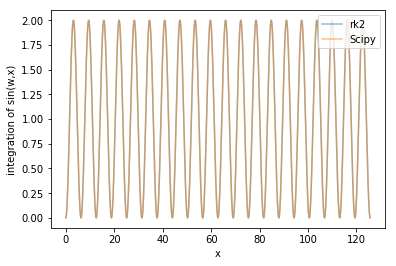

<Figure size 432x288 with 0 Axes>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scint
# Generalized rk2 ODE solver
h = 0.0001
def rk2n(func_pntr, func_args=[0, 0], init_cond=[0, 0]):
    # y_n+1 = y_n + k_2
    # k_2 = hf(t_n + h/2, y_n + k_1/2)
    # k_1 = hf(t_n, y_n)
    k_1 = h*func_pntr(*func_args)
    func_args[0] += h/2
    k_2 = h*func_pntr(*func_args)
    return init_cond[1] + (k_1 + 2*k_2)/3

def sin(w, x):
    # Assume \omega to equal 1
    return np.sin(w*x)

def scisin(y, t):
    # Returns the derivative of y = cos at a given y, t
    return np.sin(t)
w = 1
t_0 = 0
args = [w, t_0]
in_cond = [t_0, 0]
approx = [rk2n(sin, args, in_cond)]
t = 0
tvals = [t]

while t < 40*np.pi:
    t += h
    tvals.append(t)
    args = [w, tvals[-1]]
    in_cond = [tvals[-1], approx[-1]]
    approx.append(rk2n(sin, args, in_cond))

plt.plot(tvals, approx, label="rk2", alpha=0.5)

# Compare to scipy odeint
init_cond = 0
y = scint.odeint(scisin, init_cond, tvals)
plt.plot(tvals, y, label="Scipy", alpha=0.5)
plt.legend(loc=1)
plt.xlabel("x")
plt.ylabel("integration of sin(w,x)")
plt.savefig("tvals.png")
plt.figure()

(b) Next, try out your solver with the function $$f(t,y)=1 + y^2+t^3$$ with
start values of $(t0,y0)=(1.,-4.)$ and let it run to $t=2.0$ (*i.e.,* 1 second).
Pick a reasonable number of steps, such as 100. Plot $y$ as a function of time
and compare with the result from the canned odeint solver.

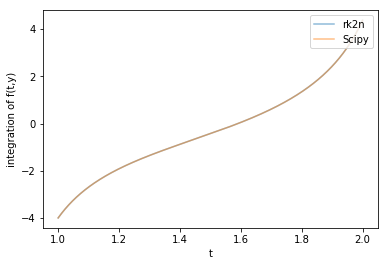

In [3]:
# Part b, solve with f(t, y) = 1 + y^2 + t^3
def fty(t, y):
    return 1 + y**2 + t**3

def scifty(y, t):
    return 1 + y**2 + t**3
# Init variables
t = 1
btvals = [t]
bargs = [1, -4]
init_cond = [1, -4]
# Init conditions same as init args...
bapprox = [-4]

while t < 2:
    t += h
    btvals.append(t)
    bargs = [btvals[-1], bapprox[-1]]
    init_cond = bargs
    bapprox.append(rk2n(fty, bargs, init_cond))

plt.plot(btvals, bapprox, label="rk2n", alpha=0.5)
# Compare to scipy odeint
y = scint.odeint(scifty, y0=-4, t=btvals)
plt.plot(btvals, y, label="Scipy", alpha=0.5)
plt.legend(loc=1)
plt.xlabel("t")
plt.ylabel("integration of f(t,y)")
plt.savefig("b.png")


----------------------
## Problem 2
Use a solver, such as Scipy odeint, to
explore the Van der Pol equation in phase space (see Lectures1.ipynb and links
therein). Pick at least one large and one small value of $\xi$, and try starting
positions inside and outside the limit cycle. Find a reasonable range of total
time to show the limit cycles clearly.

Text(15.75, 0.5, '$\\dot{\\phi}$')

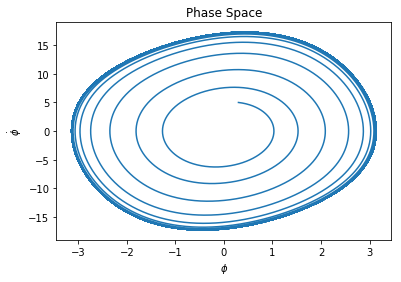

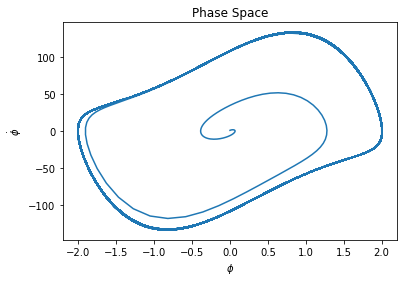

In [30]:
import numpy as np
import scipy.integrate as scint
import matplotlib.pyplot as plt
w = np.sqrt(3)*np.pi
u = 0.334
I = 1.567
def van_der_pol(Y,t, w, u, I):
    # y'' = -w^2*y - u(y^2 - I^2)y'
    # Define x_2 = y'
    # Define x_1 = y
    # Define x_1' = x_2
    # Define x_2' = y''
    # Our equation is now
    # x_2' = -w^2*x_1 - u(x_1^2 - I^2)*x_2
    # Solve for x_1' and x_2'
    return [Y[1], -w**2*Y[0]-u*(Y[0]**2 - I**2)*Y[1]]
t = np.linspace(-100, 100, 100000)
y = scint.odeint(van_der_pol, [0.3,5], t, (w, u, I))
plt.plot(y[:,0], y[:,1])
plt.savefig("vdp.png")
plt.title("Phase Space")
plt.xlabel("$\phi$")
plt.ylabel("$\dot{\phi}$")
plt.figure()

t = np.linspace(-100, 100, 100000)
y = scint.odeint(van_der_pol, [0,1], t, (50, 50, 1))
plt.plot(y[:,0], y[:,1])
plt.savefig("vdp.png")
plt.title("Phase Space")
plt.xlabel("$\phi$")
plt.ylabel("$\dot{\phi}$")

-------------
## Problem 3
Following a suggested problem in Chapter 8.8 your
textbook, we now look at oscillations in potentials of the form $V(x) =
\frac{1}{p} kx^p$.

a) See equation (8.7), and use the odeint solver to plot the
oscillations $x(t)$ of systems with $p = 2,4,8$, in all cases setting
$F_\text{ext}=0$ (for now). Also plot $V(x)$ for each $p$ along with $x(t)$.
Check that energy is conserved during the oscillations.

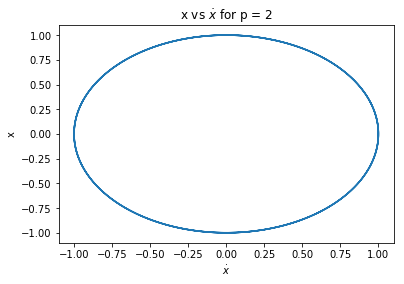

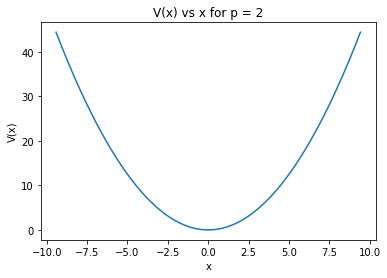

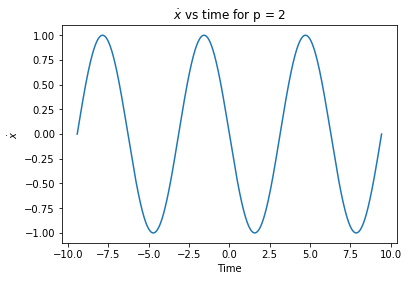

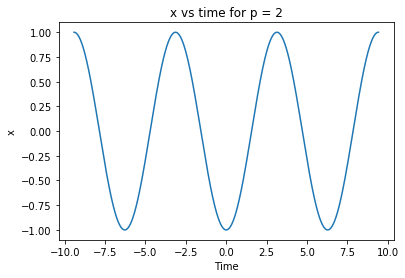

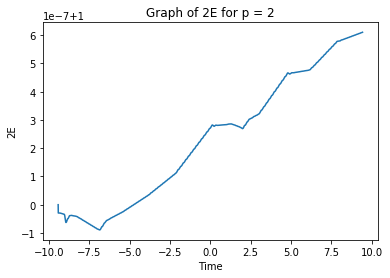

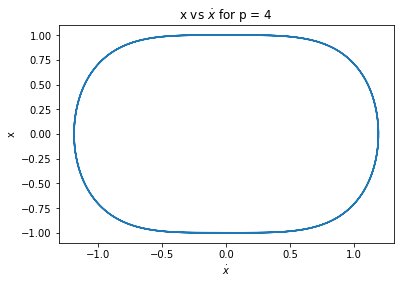

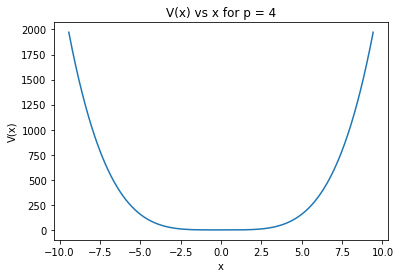

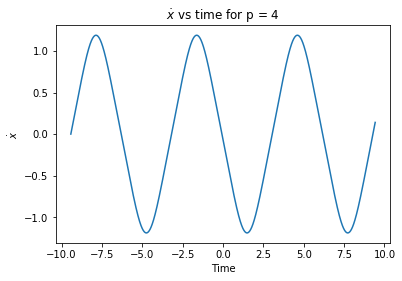

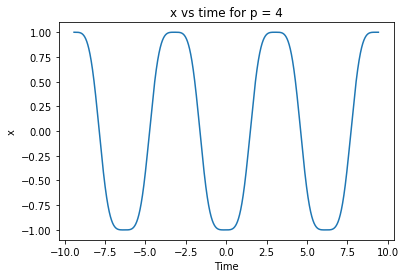

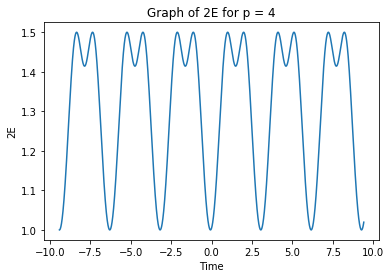

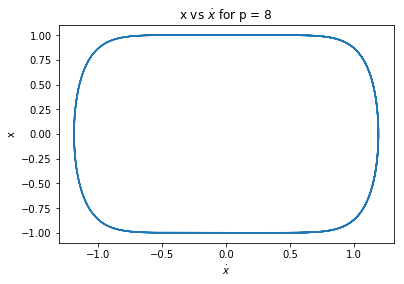

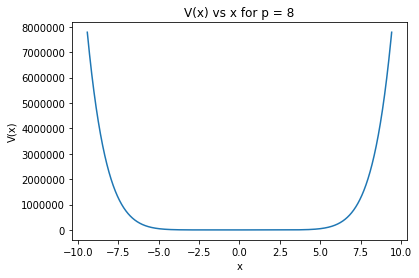

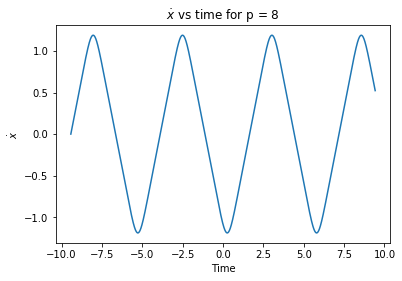

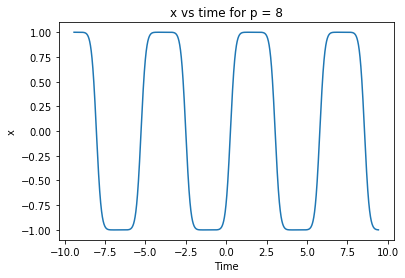

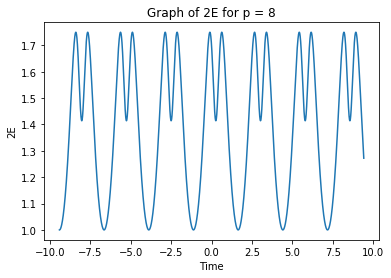

In [31]:
# ---------------------------------------------------------------------
# Import Statements
# ---------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scint
# ---------------------------------------------------------------------
# Constant Definitions
# ---------------------------------------------------------------------
k = 1
m = 1
t = np.linspace(-3*np.pi*np.sqrt(k/m), 3*np.pi*np.sqrt(k/m), 10000)
F_0 = 30
w = 8*np.pi
# ---------------------------------------------------------------------
# Function Definitions
# ---------------------------------------------------------------------
def V(x, p, k):
    return (k/p)*(x**p)

# Describe our function as y'' is a function of its derivatives
def ddotx(X, t, k, m, p):
    # m * x'' = F_ext - (deriv V)
    # with f_ext = 0, deriv V = kx**p-1...
    # mx'' = -kx**p-1
    # x'' = -k/m * x**p-1
    # Now convert into two first order diffs
    # Define y_2 = x'
    # Define y_1 = x
    # Define y_1' = x' = y_2
    # Define y_2' = x''
    # solve for y_1' and y_2'
    # The equation is now  y_2' = -k/m * y_1**p-1
    # In summary, the nth element is the nth derivative of X
    return [X[1], (-k/m)*X[0]**(p-1)]

def fext_ddotx(X, t, F_0, w, k, m, p):
    # m * x'' = F_ext - (deriv V)
    # with f_ext != 0, deriv V = kx**p-1...
    # mx'' = F_0sin(\omega t) - kx**p-1
    # x'' = F_0sin(omega t))/m -k/m * x**p-1
    # Now convert into two first order diffs
    # Define y_2 = x'
    # Define y_1 = x
    # Define y_1' = x' = y_2
    # Define y_2' = x''
    # solve for y_1' and y_2'
    # The equation is now  y_2' = -k/m * y_1**p-1 + F_0sin(omega t)/m)
    # In summary, the nth element is the nth derivative of X
    return [X[1], (-k/m)*X[0]**(p-1) + (F_0/m)*np.sin(w*t)]
# ---------------------------------------------------------------------
# Main Loop
# ---------------------------------------------------------------------
for p in [2, 4, 8]: 
    y = scint.odeint(ddotx, [0, 1], t, (k, m, p))
    v = V(t, p, 1)
    # Graph of phasespace
    plt.figure()
    plt.plot(y[:,0], y[:,1])
    plt.title("x vs $\dot{x}$ for p = " + str(p))
    plt.xlabel("$\dot{x}$")
    plt.ylabel("x")
    plt.savefig(str(p)+"phasespace.pdf")
    # Graph of potential
    plt.figure()
    plt.plot(t, v)
    plt.title("V(x) vs x for p = "+str(p))
    plt.xlabel("x")
    plt.ylabel("V(x)")
    plt.savefig(str(p)+"pot.pdf")
    # Graph of xdot
    plt.figure()
    plt.plot(t, y[:,0])
    plt.xlabel("Time")
    plt.ylabel("$\dot{x}$")
    plt.title("$\dot{x}$ vs time for p = " + str(p))
    plt.savefig(str(p)+"y0.pdf")
    # Graph of x
    plt.figure()
    plt.plot(t, y[:,1])
    plt.title("x vs time for p = " + str(p))
    plt.xlabel("Time")
    plt.ylabel("x")
    plt.savefig(str(p)+"y1.pdf")
    # Graph of energy 
    plt.figure()
    Edata = y[:,1]**2 + y[:,0]**2
    plt.plot(t, Edata)
    plt.title("Graph of 2E for p = " + str(p))
    plt.xlabel("Time")
    plt.ylabel("2E")
    plt.savefig(str(p)+"e.pdf")

b) Figure out how to assess the period of oscillations (note, the book has some
advice about checking at least three full cycles to estimate the period, because
the motion may be asymmetric). Plot the period of oscillations as a function of
initial amplitude for $p=2,4,8$. How does this differ from the simple harmonic
oscillator?

The period can be given by $\omega = 2\pi \sqrt{\frac{k}{m}}$

c) Now, following section 8.10 of your book, add the external driving force
$F_\text{ext}$ to the harmonic oscillator system with $p=2$. $$F_\text{ext}(t) =
F_0 \sin(\omega t)$$

First, plot the oscillation of this system for a very
large $F_0$ value. 

Then, reduce $F_0$ until it is approximately equal to the
system restoring force $F_k(x) = -dV(x)/dx$, and verify that you see a beat
frequency of $(\omega - \omega_0)/2\pi$, where $\omega_0$ is the natural
frequency of the system.

Next, plot the maximum amplitude as a function of the
driving frequency $\omega$ by scanning the interval $\omega_0/10 \leq \omega
\leq 10\omega_0$.  What features do you observe?

Finally, repeat the previous
scan over $\omega$ with a new, non-linear system having $p=4$.  (You may have to
retune $F_0$.)  How does the response of this system differ from the linear
system having $p=2$?

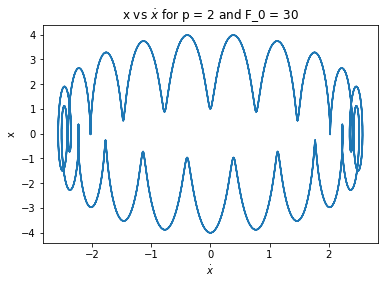

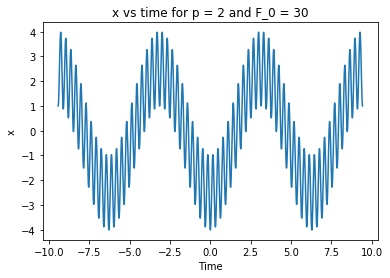

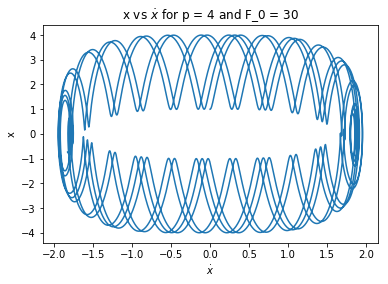

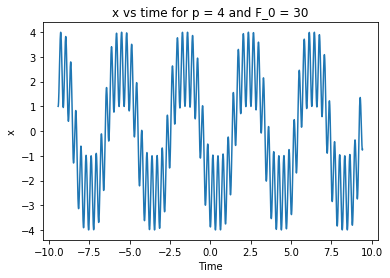

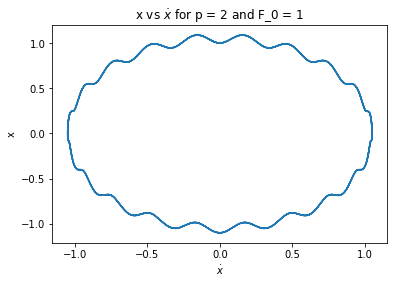

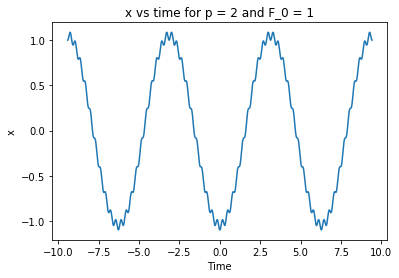

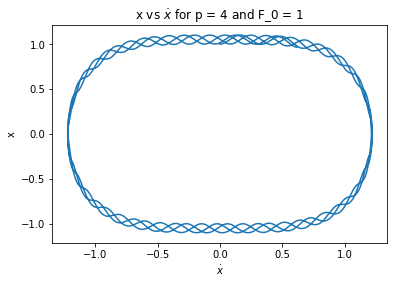

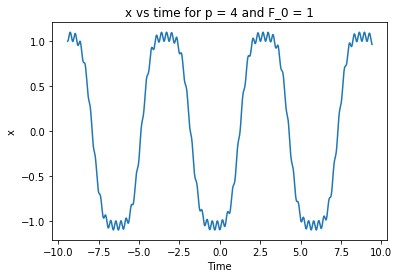

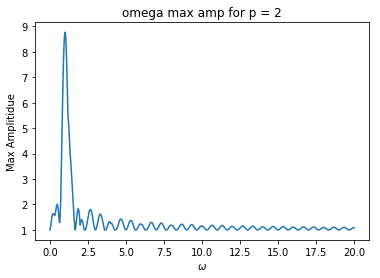

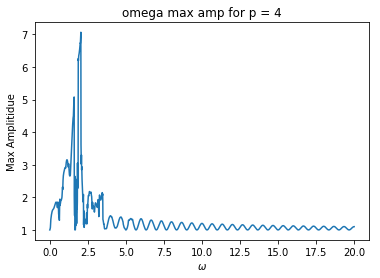

In [34]:
# Main loop but with F_ext != 0
for F_0 in [30, 1]:
    for p in [2, 4]:
        y = scint.odeint(fext_ddotx, [0, 1], t, (F_0, w, k, m, p))
        # Graph of phase space
        plt.figure()
        plt.plot(y[:,0], y[:,1])
        plt.title("x vs $\dot{x}$ for p = " + str(p) + " and F_0 = " + str(F_0))
        plt.xlabel("$\dot{x}$")
        plt.ylabel("x")
        plt.savefig(str(F_0)+str(p)+"phasespacef0.pdf")
        # Graph of x
        plt.figure()
        plt.plot(t, y[:,1])
        plt.title("x vs time for p = " + str(p)+ " and F_0 = " + str(F_0))
        plt.xlabel("Time")
        plt.ylabel("x")
        plt.savefig(str(F_0)+str(p)+"f0.pdf")
        
# Plot the max amp as a function of the driving frequency
omega = np.linspace(0, 20, 2000)
for p in [2, 4]:
    maxamp = []
    for w in omega:
        y = scint.odeint(fext_ddotx, [0, 1], t, (F_0, w, k, m, p))
        maxamp.append(max(y[:, 1]))
    plt.figure()
    plt.plot(omega, maxamp)
    plt.title("omega max amp for p = " + str(p))
    plt.xlabel("$\omega$")
    plt.ylabel("Max Amplitidue")
    plt.savefig(str(p)+"omegavsmaxamp.pdf")


 We can see a resonant frequency for a linear oscillator, and chaos for when p=4

-------------------
## Problem 4
Look again at what we did in class for the
simple pendulum with a periodic driving force and damping. You may use that
code, or write your own if you prefer, to explore.

a) With zero driving force
and zero or small damping, start the system at $\theta=0$ and gradually increase
the initial value of $\dot{\theta}$. Can you produce "over-the-top" motions?

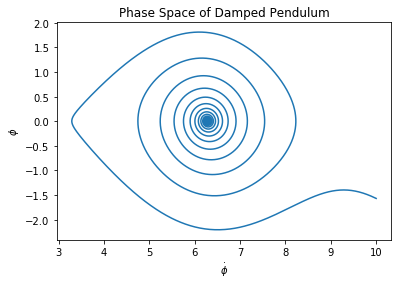

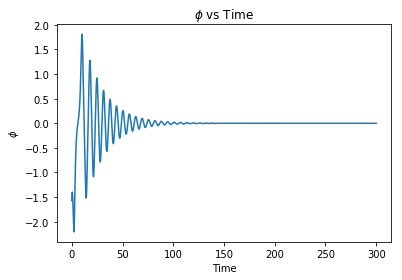

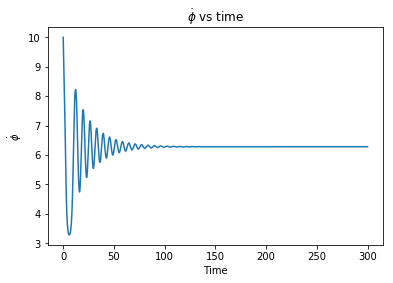

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scint
def ddp(phi, t, A, l, w_0, w, g):
    # ddotphi + g*dotphi + w0^2sin(phi) = (A/l)w0^2cos(wt)
    # Solve for y''
    # ddot phi = (A/l)w0^2cos(wt) - w0^2sin(phi) - g*dotphi
    # Define y_2 = phidot
    # Define y_1 = phi
    # Define y_1' = y_2 = phidot
    # Define y_2' = ddotphi
    # The equation is now y_2' = (A/l)w0^2cos(wt) - w0^2sin(y_1) - g*y_1'
    a = (A/l)*(w_0**2)*np.cos(w*t)
    b = (w_0**2) * np.sin(phi[0])
    c = g * phi[1]
    return (phi[1], a - b - c)
# No driving force (A = 0)
# No damping (g = 0)
t = np.linspace(0, 300, 30000)
y = scint.odeint(ddp, [10,-1*np.pi/2], t, args=(0, 1, 1, 0, .1))
# Plot for Phase Space
plt.plot(y[:,0], y[:,1])
plt.title("Phase Space of Damped Pendulum")
plt.xlabel("$\dot{\phi}$")
plt.ylabel("$\phi$")
plt.savefig("phasespace.pdf")
# Plot for phi vs time
plt.figure()
plt.plot(t, y[:,1])
plt.xlabel("Time")
plt.ylabel("$\phi$")
plt.title("$\phi$ vs Time")
plt.savefig("phivtime.pdf")

# Plot for phidot vs time
plt.figure()
plt.plot(t, y[:,0])
plt.xlabel("Time")
plt.ylabel("$\dot{\phi}$")
plt.title("$\dot{\phi}$ vs time")
plt.savefig("phidotvtime.pdf")

b) Now make plots in phase space: make your own version of the plot in your
textbook shown in figure 15.4 (p368) using your pendulum code and adjusting the
parameters in whatever way you think is the clearest. Describe each of the main
features. Explore what happens with the damping the driving forces at various
strenghts.

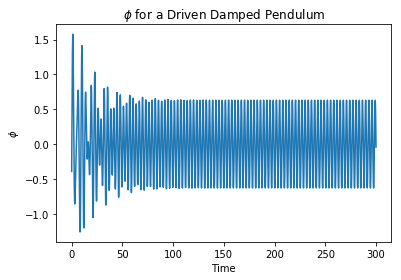

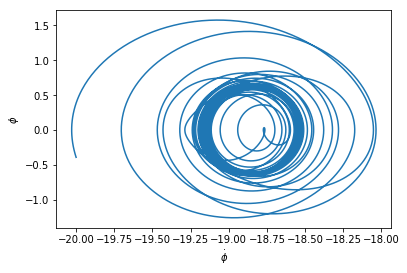

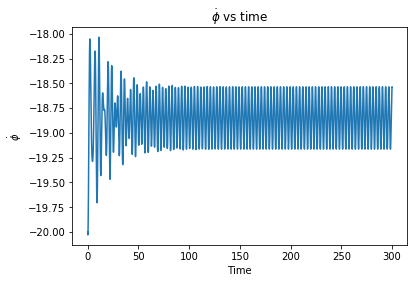

In [36]:
# Part b, adjust errything
y = scint.odeint(ddp, [-20, -1*np.pi/8], t, args=(1, 4, 1.5, 2, .1))
plt.figure()
plt.plot(t, y[:,1])
plt.xlabel("Time")
plt.ylabel("$\phi$")
plt.title("$\phi$ for a Driven Damped Pendulum")
plt.savefig("bphi.pdf")

plt.figure()
plt.plot(y[:,0], y[:,1])
plt.xlabel("$\dot{\phi}$")
plt.ylabel("$\phi$")
plt.savefig("bphasespace.pdf")

# Plot for phidot vs time
plt.figure()
plt.plot(t, y[:,0])
plt.xlabel("Time")
plt.title("$\dot{\phi}$ vs time")
plt.ylabel("$\dot{\phi}$")
plt.savefig("bphidotvtime.pdf")


c) Read section 15.2.1 and try to find at least one of the types of complex
behaviors described there in your oscillator. If you need a start, you might
find section 15.2.2 helpful. Show and explain your results. (Some of you might
want to pursue this topic further in your project.)

The phasespace graph generated in part shows "Over the top" motion at the right edge. If I had time to finish this project (I had to attend a colloquium for my research from 3:20-4:55 on todays due date, so I could not adjust my parameters to extend this graph) I would be able to completely match the figure from the book. The phase space graph from part b shows the interference from the harmonics and subharmonics causing nonlinear chaotic motion. as time increases, the frequency of the system matches the frequency of the driving force. The phase space graph shows this as it becomes more circular.